In [8]:
label_map = {
    'Not Drowsy': 'alert', 'Slight': 'drowsy', 'Moderate': 'drowsy', 'Very': 'drowsy'
}

# --- Full feature names ---
features = [
    'EAR_mean_mean', 'MAR_inner_mean', 'MAR_outer_mean', 'AU01_r_mean', 'AU15_r_mean', 'AU25_r_mean', 'AU26_r_mean',
    'AU45_r_mean', 'pose_Tx_mean', 'pose_Ty_mean', 'pose_Tz_mean', 'pose_Rx_mean', 'pose_Ry_mean', 'pose_Rz_mean',
    'gaze_angle_x_mean', 'gaze_angle_y_mean', 'swAngle_mean', 'laneDevPosition_mean', 'laneDev_OffsetfrmLaneCentre_mean',
    'speed_mean', 'EAR_mean_std', 'MAR_inner_std', 'MAR_outer_std', 'AU01_r_std', 'AU15_r_std',
    'AU25_r_std', 'AU26_r_std', 'AU45_r_std', 'pose_Tx_std', 'pose_Ty_std', 'pose_Tz_std', 'pose_Rx_std', 'pose_Ry_std',
    'pose_Rz_std', 'gaze_angle_x_std', 'gaze_angle_y_std', 'swAngle_std', 'laneDevPosition_std',
    'laneDev_OffsetfrmLaneCentre_std', 'speed_std'
]

📊 Class distribution in training set BEFORE SMOTE:
  drowsy: 3662 samples
  alert: 829 samples

📊 Class distribution in test set:
  drowsy: 751 samples
  alert: 269 samples

📊 Class distribution in training set AFTER SMOTE:
  alert: 3662 samples
  drowsy: 3662 samples


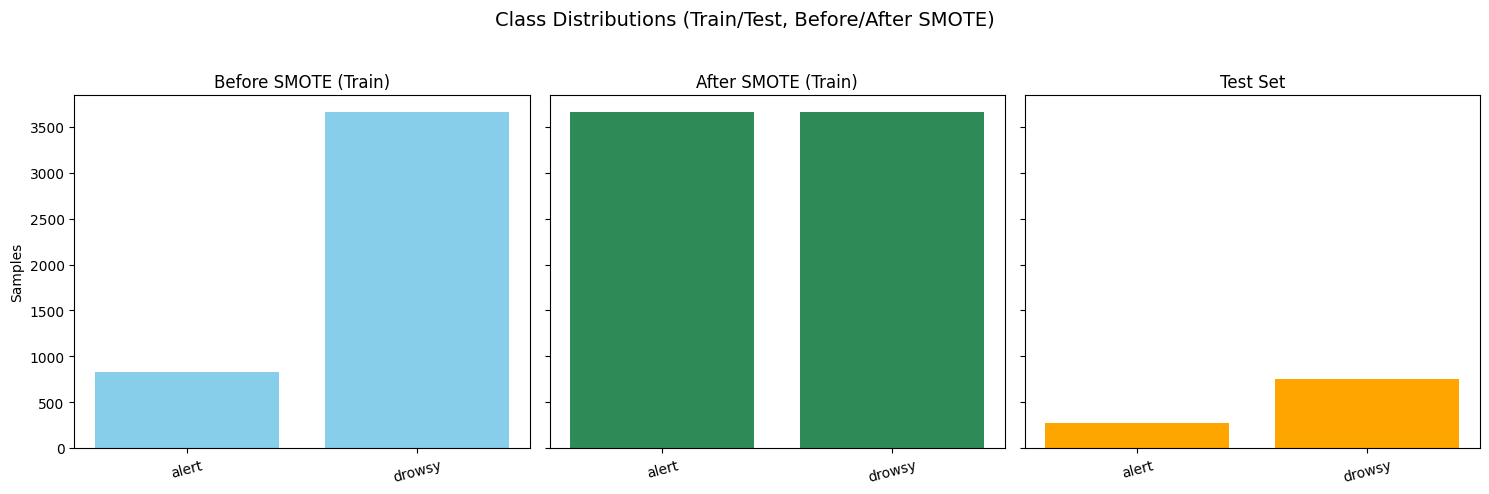

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# --- Load datasets ---
# train_df = pd.read_csv('Classification_Combined_Data/S1_S2_train_data.csv')
# test_df = pd.read_csv('Classification_Combined_Data/S1_S2_test_data.csv')
train_df = pd.read_csv('Classification_Combined_Data/S1_S2_train_data_noOverlap.csv')
test_df = pd.read_csv('Classification_Combined_Data/S1_S2_test_data_noOverlap.csv')

# --- Map and clean labels ---
train_df['Label'] = train_df['Label'].map(label_map)
test_df['Label'] = test_df['Label'].map(label_map)

train_df = train_df[train_df['Label'].notna()]
test_df = test_df[test_df['Label'].notna()]

# --- Extract features and labels ---
X_train = train_df[features]
y_train = train_df['Label']
X_test = test_df[features]
y_test = test_df['Label']

# --- Encode string labels to integers ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- Class distribution BEFORE SMOTE ---
print("📊 Class distribution in training set BEFORE SMOTE:")
before_counts = y_train.value_counts()
for label, count in before_counts.items():
    print(f"  {label}: {count} samples")

# --- Class distribution in TEST set ---
print("\n📊 Class distribution in test set:")
test_counts = y_test.value_counts()
for label, count in test_counts.items():
    print(f"  {label}: {count} samples")

# --- Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train_enc)

# --- Class distribution AFTER SMOTE ---
y_train_labels_sm = le.inverse_transform(y_train_sm)
after_counts = pd.Series(y_train_labels_sm).value_counts()

print("\n📊 Class distribution in training set AFTER SMOTE:")
for label, count in after_counts.items():
    print(f"  {label}: {count} samples")

# --- Custom label order (if you want consistent axis order) ---
all_labels = sorted(set(before_counts.index).union(after_counts.index).union(test_counts.index))

# --- Reindex for plotting ---
before_counts = before_counts.reindex(all_labels, fill_value=0)
after_counts = after_counts.reindex(all_labels, fill_value=0)
test_counts = test_counts.reindex(all_labels, fill_value=0)

# --- Plot 1×3 comparison ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Before SMOTE
axes[0].bar(before_counts.index, before_counts.values, color='skyblue')
axes[0].set_title("Before SMOTE (Train)")
axes[0].set_ylabel("Samples")
axes[0].tick_params(axis='x', rotation=15)

# After SMOTE
axes[1].bar(after_counts.index, after_counts.values, color='seagreen')
axes[1].set_title("After SMOTE (Train)")
axes[1].tick_params(axis='x', rotation=15)

# Test Set
axes[2].bar(test_counts.index, test_counts.values, color='orange')
axes[2].set_title("Test Set")
axes[2].tick_params(axis='x', rotation=15)

plt.suptitle("Class Distributions (Train/Test, Before/After SMOTE)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

✅ Selected features (20):
[np.str_('MAR_outer_mean'), np.str_('AU01_r_mean'), np.str_('AU15_r_mean'), np.str_('AU25_r_mean'), np.str_('AU26_r_mean'), np.str_('AU45_r_mean'), np.str_('pose_Tx_mean'), np.str_('pose_Rx_mean'), np.str_('pose_Ry_mean'), np.str_('gaze_angle_x_mean'), np.str_('laneDev_OffsetfrmLaneCentre_mean'), np.str_('speed_mean'), np.str_('AU25_r_std'), np.str_('pose_Tx_std'), np.str_('pose_Ty_std'), np.str_('pose_Tz_std'), np.str_('pose_Rz_std'), np.str_('gaze_angle_y_std'), np.str_('swAngle_std'), np.str_('laneDev_OffsetfrmLaneCentre_std')]
Iteration 1, loss = 2.09724092
Validation score: 0.406300
Iteration 2, loss = 1.18475770
Validation score: 0.466074
Iteration 3, loss = 1.10170357
Validation score: 0.500808
Iteration 4, loss = 1.07110802
Validation score: 0.518578
Iteration 5, loss = 1.05099515
Validation score: 0.499192
Iteration 6, loss = 1.03453556
Validation score: 0.523425
Iteration 7, loss = 1.01876082
Validation score: 0.534733
Iteration 8, loss = 0.99408831


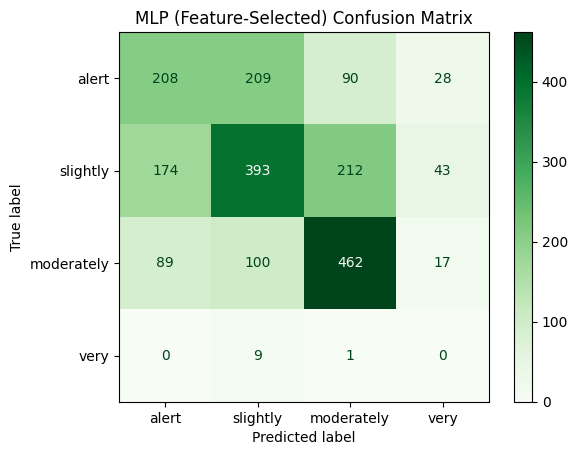

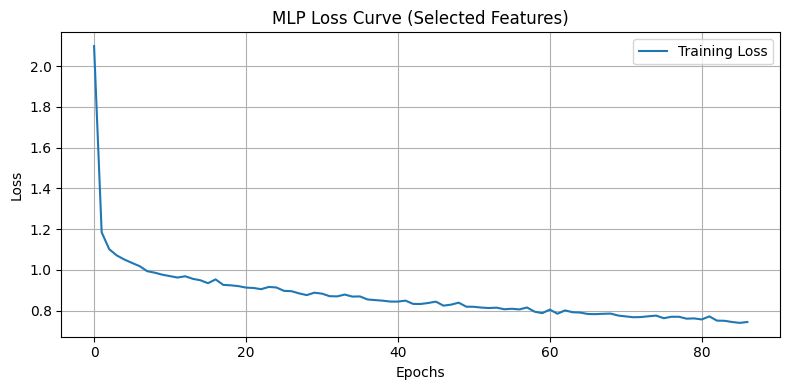

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score
)
import numpy as np
import matplotlib.pyplot as plt

# --- Create validation split ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_sm, y_train_sm, test_size=0.2, random_state=42, stratify=y_train_sm
)

label_map = {
    'Not Drowsy': 'alert', 'Slight': 'slightly', 'Moderate': 'moderately', 'Very': 'very'
}

# --- Full feature names ---
features_all = [
    'EAR_mean_mean', 'MAR_inner_mean', 'MAR_outer_mean', 'AU01_r_mean', 'AU15_r_mean', 'AU25_r_mean', 'AU26_r_mean',
    'AU45_r_mean', 'pose_Tx_mean', 'pose_Ty_mean', 'pose_Tz_mean', 'pose_Rx_mean', 'pose_Ry_mean', 'pose_Rz_mean',
    'gaze_angle_x_mean', 'gaze_angle_y_mean', 'swAngle_mean', 'laneDevPosition_mean', 'laneDev_OffsetfrmLaneCentre_mean',
    'speed_mean', 'EAR_mean_std', 'MAR_inner_std', 'MAR_outer_std', 'AU01_r_std', 'AU15_r_std',
    'AU25_r_std', 'AU26_r_std', 'AU45_r_std', 'pose_Tx_std', 'pose_Ty_std', 'pose_Tz_std', 'pose_Rx_std', 'pose_Ry_std',
    'pose_Rz_std', 'gaze_angle_x_std', 'gaze_angle_y_std', 'swAngle_std', 'laneDevPosition_std',
    'laneDev_OffsetfrmLaneCentre_std', 'speed_std'
]

# --- Feature selection pipeline ---
mlp_base = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False,
    n_iter_no_change=10
)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('mlp', mlp_base)
])

# --- Sequential Feature Selection ---
sfs = SequentialFeatureSelector(
    estimator=pipe,
    n_features_to_select=20,  # or try 15/25
    direction='forward',
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
sfs.fit(X_train_sm, y_train_sm)

# --- Selected feature names ---
selected_features = list(np.array(features_all)[sfs.get_support()])
print(f"✅ Selected features ({len(selected_features)}):")
print(selected_features)

# --- Retrain MLP on selected features ---
X_train_fs = X_train_sm[selected_features]
X_test_fs = X_test[selected_features]

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_fs, y_train_sm, test_size=0.2, random_state=42, stratify=y_train_sm
)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True,
    n_iter_no_change=10
)

mlp.fit(X_tr, y_tr)

# --- Predict on test ---
y_pred_mlp = mlp.predict(X_test_fs)
y_proba_mlp = mlp.predict_proba(X_test_fs)[:, 1] if len(np.unique(y_test_enc)) == 2 else mlp.predict_proba(X_test_fs)

# --- Custom label order ---
custom_order = ['alert', 'slightly', 'moderately', 'very']
custom_label_indices = [list(le.classes_).index(lbl) for lbl in custom_order]

# --- Classification report ---
print("MLP (Feature-Selected):\n")
print(classification_report(
    y_test_enc,
    y_pred_mlp,
    labels=custom_label_indices,
    target_names=custom_order
))

# --- Balanced F1 Score ---
f1_macro = f1_score(y_test_enc, y_pred_mlp, average='macro')
f1_weighted = f1_score(y_test_enc, y_pred_mlp, average='weighted')
print(f"Balanced F1 Score (macro): {f1_macro:.4f}")
print(f"Balanced F1 Score (weighted): {f1_weighted:.4f}")

# --- ROC AUC ---
if len(np.unique(y_test_enc)) == 2:
    auc_score = roc_auc_score(y_test_enc, y_proba_mlp)
else:
    auc_score = roc_auc_score(y_test_enc, y_proba_mlp, multi_class='ovr', average='macro')

print(f"ROC AUC: {auc_score:.4f}")

# --- Confusion matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test_enc,
    y_pred_mlp,
    labels=custom_label_indices,
    display_labels=custom_order,
    cmap='Greens'
)
plt.title("MLP (Feature-Selected) Confusion Matrix")
plt.show()

# --- Loss curve ---
plt.figure(figsize=(8, 4))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title("MLP Loss Curve (Selected Features)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

✅ Selected features (15):
[np.str_('AU25_r_mean'), np.str_('AU45_r_mean'), np.str_('pose_Ry_mean'), np.str_('gaze_angle_y_mean'), np.str_('swAngle_mean'), np.str_('laneDevPosition_mean'), np.str_('laneDev_OffsetfrmLaneCentre_mean'), np.str_('speed_mean'), np.str_('MAR_inner_std'), np.str_('AU15_r_std'), np.str_('AU25_r_std'), np.str_('pose_Tx_std'), np.str_('pose_Ty_std'), np.str_('pose_Rx_std'), np.str_('speed_std')]
Iteration 1, loss = 0.70780717
Validation score: 0.587031
Iteration 2, loss = 0.65924914
Validation score: 0.588737
Iteration 3, loss = 0.65066465
Validation score: 0.612628
Iteration 4, loss = 0.65189895
Validation score: 0.600683
Iteration 5, loss = 0.64565966
Validation score: 0.564846
Iteration 6, loss = 0.64366160
Validation score: 0.617747
Iteration 7, loss = 0.63688917
Validation score: 0.612628
Iteration 8, loss = 0.63927007
Validation score: 0.626280
Iteration 9, loss = 0.63787593
Validation score: 0.604096
Iteration 10, loss = 0.64057911
Validation score: 0.5187

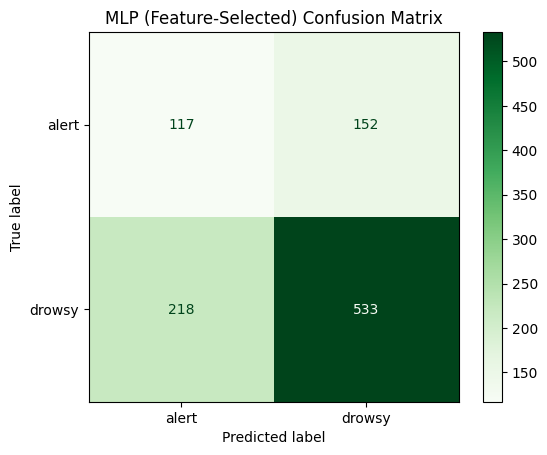

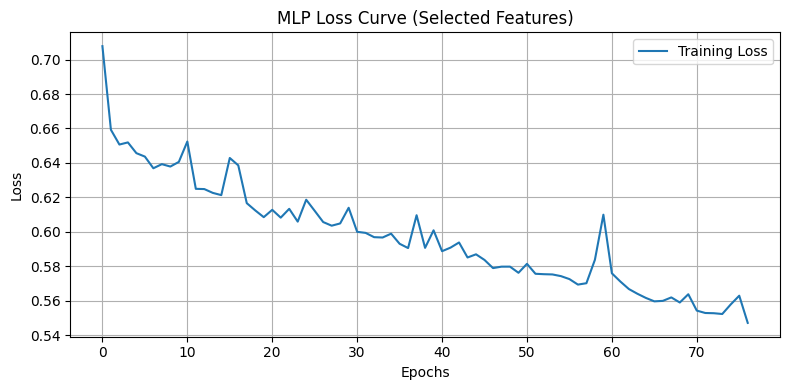

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score
)
import numpy as np
import matplotlib.pyplot as plt

# --- Create validation split ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_sm, y_train_sm, test_size=0.2, random_state=42, stratify=y_train_sm
)

# --- Full feature names ---
features_all = [
    'EAR_mean_mean', 'MAR_inner_mean', 'MAR_outer_mean', 'AU01_r_mean', 'AU15_r_mean', 'AU25_r_mean', 'AU26_r_mean',
    'AU45_r_mean', 'pose_Tx_mean', 'pose_Ty_mean', 'pose_Tz_mean', 'pose_Rx_mean', 'pose_Ry_mean', 'pose_Rz_mean',
    'gaze_angle_x_mean', 'gaze_angle_y_mean', 'swAngle_mean', 'laneDevPosition_mean', 'laneDev_OffsetfrmLaneCentre_mean',
    'speed_mean', 'EAR_mean_std', 'MAR_inner_std', 'MAR_outer_std', 'AU01_r_std', 'AU15_r_std',
    'AU25_r_std', 'AU26_r_std', 'AU45_r_std', 'pose_Tx_std', 'pose_Ty_std', 'pose_Tz_std', 'pose_Rx_std', 'pose_Ry_std',
    'pose_Rz_std', 'gaze_angle_x_std', 'gaze_angle_y_std', 'swAngle_std', 'laneDevPosition_std',
    'laneDev_OffsetfrmLaneCentre_std', 'speed_std'
]

# --- Feature selection pipeline ---
mlp_base = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False,
    n_iter_no_change=10
)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('mlp', mlp_base)
])

# --- Sequential Feature Selection ---
sfs = SequentialFeatureSelector(
    estimator=pipe,
    n_features_to_select=15,  # or try 15/25
    direction='forward',
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)
sfs.fit(X_train_sm, y_train_sm)

# --- Selected feature names ---
selected_features = list(np.array(features_all)[sfs.get_support()])
print(f"✅ Selected features ({len(selected_features)}):")
print(selected_features)

# --- Retrain MLP on selected features ---
X_train_fs = X_train_sm[selected_features]
X_test_fs = X_test[selected_features]

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_fs, y_train_sm, test_size=0.2, random_state=42, stratify=y_train_sm
)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True,
    n_iter_no_change=10
)

mlp.fit(X_tr, y_tr)

# --- Predict on test ---
y_pred_mlp = mlp.predict(X_test_fs)
y_proba_mlp = mlp.predict_proba(X_test_fs)[:, 1] if len(np.unique(y_test_enc)) == 2 else mlp.predict_proba(X_test_fs)

# --- Custom label order ---
custom_order = ['alert', 'drowsy']
custom_label_indices = [list(le.classes_).index(lbl) for lbl in custom_order]

# --- Classification report ---
print("MLP (Feature-Selected):\n")
print(classification_report(
    y_test_enc,
    y_pred_mlp,
    labels=custom_label_indices,
    target_names=custom_order
))

# --- Balanced F1 Score ---
f1_macro = f1_score(y_test_enc, y_pred_mlp, average='macro')
f1_weighted = f1_score(y_test_enc, y_pred_mlp, average='weighted')
print(f"Balanced F1 Score (macro): {f1_macro:.4f}")
print(f"Balanced F1 Score (weighted): {f1_weighted:.4f}")

# --- ROC AUC ---
if len(np.unique(y_test_enc)) == 2:
    auc_score = roc_auc_score(y_test_enc, y_proba_mlp)
else:
    auc_score = roc_auc_score(y_test_enc, y_proba_mlp, multi_class='ovr', average='macro')

print(f"ROC AUC: {auc_score:.4f}")

# --- Confusion matrix ---
ConfusionMatrixDisplay.from_predictions(
    y_test_enc,
    y_pred_mlp,
    labels=custom_label_indices,
    display_labels=custom_order,
    cmap='Greens'
)
plt.title("MLP (Feature-Selected) Confusion Matrix")
plt.show()

# --- Loss curve ---
plt.figure(figsize=(8, 4))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title("MLP Loss Curve (Selected Features)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()